In [1]:
# =========================================================
# 🔌 Cargar entorno y librerías
# =========================================================
%load_ext kedro.ipython

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# =========================================================
# 1️⃣ Cargar dataset desde Kedro
# =========================================================
df = catalog.load("Features_training_v2").copy()
print("Shape del dataset:", df.shape)

# =========================================================
# 2️⃣ Seleccionar variables según la hipótesis
# =========================================================
features = [
    "Monetary",
    "TimeSinceLastTxn",
    "Recency",
    "TxnCountInLast24Hours",
    "AmountZScoreByLocation"
]
target = "TransactionAmount (INR)"

df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]


[10/24/25 02:15:42] INFO     Using                                                                  ]8;id=149550;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=16584;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\                
                             framework\project\rich_logging.yml' as logging configuration.                         

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=713744;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=273466;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=230896;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=133964;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=857119;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=397611;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             C:\Users\Kevin\Documents\GitHub\Ml_Bank\proyecto-ml-sebastiancarrera-k                
                             evinvivanco.                                                                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/24/25 02:15:45] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=221363;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=655286;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/24/25 02:15:46] INFO     Kedro project Proyecto_ML_SebastianCarrera_KevinVivanco                ]8;id=701556;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=619666;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=495457;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=634726;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

[10/24/25 02:15:47] INFO     Registered line magic 'run_viz'                                        ]8;id=312810;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=744817;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

[10/24/25 02:15:50] INFO     Loading data from Features_training_v2 (ParquetDataset)...        ]8;id=729757;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=936002;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Shape del dataset: (984240, 6)


Mejor parámetro alpha: {'alpha': 0.0001}
R² medio (CV): 0.9658465643266219

===== Métricas del Modelo Lasso =====
R²: 0.966
MSE: 23692.472
RMSE: 153.924
MAE: 91.052


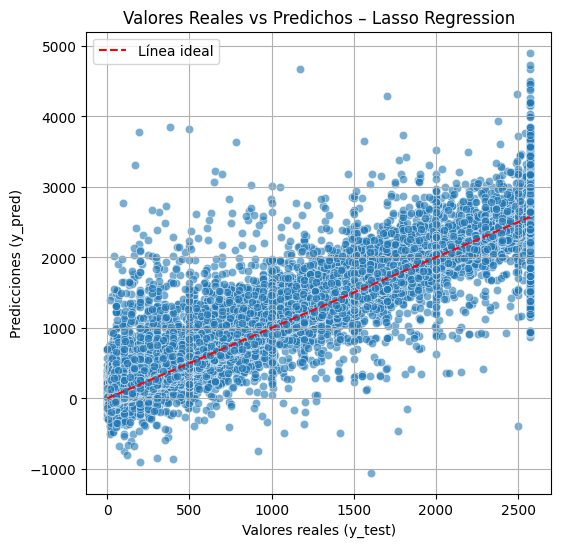

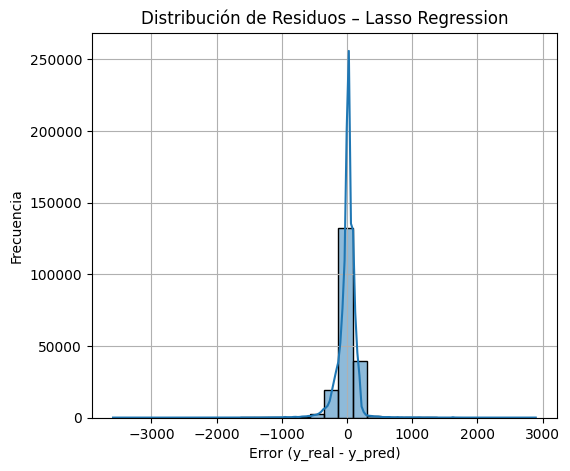

[10/24/25 02:16:25] WARNING  C:\Users\Kevin\AppData\Local\Temp\ipykernel_23232\3070561040.py:91:    ]8;id=196868;file://C:\Python313\Lib\warnings.py\warnings.py]8;;\:]8;id=465251;file://C:\Python313\Lib\warnings.py#110\110]8;;\
                             FutureWarning:                                                                        
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(data=coef_df, x="Coeficiente", y="Variable",                            
                             palette="Blues_r")                                                                    
                                                                                                                   

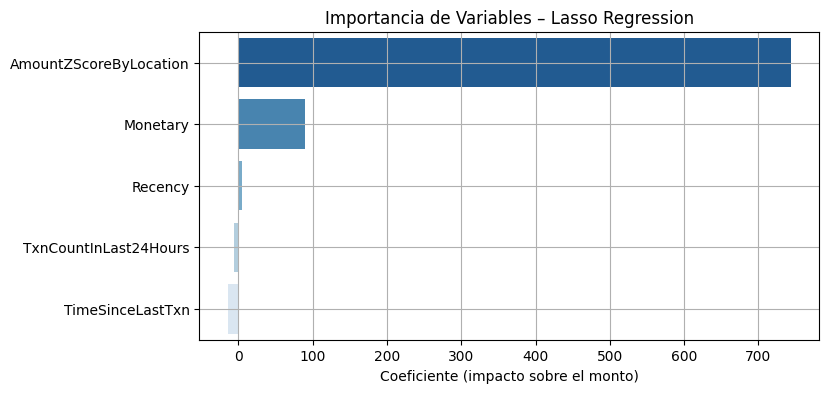


Coeficientes del modelo:
                 Variable  Coeficiente
4  AmountZScoreByLocation   744.001714
0                Monetary    89.573578
2                 Recency     5.291331
3   TxnCountInLast24Hours    -6.239541
1        TimeSinceLastTxn   -14.742592


In [2]:
# =========================================================
# 3️⃣ División Train/Test + Estandarización
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================================================
# 4️⃣ Definir modelo Lasso + GridSearchCV
# =========================================================
lasso = Lasso(max_iter=5000)

param_grid = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]  # fuerza de regularización
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_lasso = GridSearchCV(
    lasso,
    param_grid=param_grid,
    cv=cv,
    scoring="r2",
    n_jobs=-1
)

# =========================================================
# 5️⃣ Entrenamiento con validación cruzada
# =========================================================
grid_lasso.fit(X_train_scaled, y_train)

print("Mejor parámetro alpha:", grid_lasso.best_params_)
print("R² medio (CV):", grid_lasso.best_score_)

# =========================================================
# 6️⃣ Evaluación final
# =========================================================
best_lasso = grid_lasso.best_estimator_

y_pred = best_lasso.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\n===== Métricas del Modelo Lasso =====")
print(f"R²: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# =========================================================
# 7️⃣ Gráficos de evaluación
# =========================================================

# 🎯 a) Valores reales vs predichos
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Línea ideal')
plt.title("Valores Reales vs Predichos – Lasso Regression")
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.legend()
plt.grid(True)
plt.show()

# 🎯 b) Distribución de residuos
residuals = y_test - y_pred
plt.figure(figsize=(6,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribución de Residuos – Lasso Regression")
plt.xlabel("Error (y_real - y_pred)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# 🎯 c) Coeficientes del modelo
coef_df = pd.DataFrame({
    "Variable": features,
    "Coeficiente": best_lasso.coef_
}).sort_values(by="Coeficiente", ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(data=coef_df, x="Coeficiente", y="Variable", palette="Blues_r")
plt.title("Importancia de Variables – Lasso Regression")
plt.xlabel("Coeficiente (impacto sobre el monto)")
plt.ylabel("")
plt.grid(True)
plt.show()

print("\nCoeficientes del modelo:")
print(coef_df)


El modelo Lasso Regression, con el mejor parámetro de regularización α = 0.0001, mantuvo un rendimiento casi idéntico al de los modelos anteriores, alcanzando un R² = 0.966 y un MSE = 23 692.47, lo que indica que la relación entre las variables predictoras y el monto de transacción sigue siendo fuertemente lineal. La validación cruzada (R² medio = 0.9658) confirma una excelente estabilidad y ausencia de sobreajuste, mientras que el gráfico de dispersión muestra nuevamente una alineación clara entre los valores reales y predichos. La distribución de los residuos se mantiene centrada alrededor de cero, lo que evidencia un comportamiento simétrico y sin sesgo sistemático en los errores de predicción.

Desde el punto de vista interpretativo, el modelo Lasso permitió observar el impacto relativo de cada variable, destacando a AmountZScoreByLocation y Monetary como los factores con mayor influencia positiva sobre el monto de gasto futuro. En contraste, variables como Recency, TimeSinceLastTxn y TxnCountInLast24Hours presentaron coeficientes muy bajos o ligeramente negativos, reflejando un aporte marginal en la explicación del monto individual. Esto sugiere que las variables de comportamiento financiero tienen un peso mucho mayor que las temporales. En síntesis, Lasso confirma la robustez del modelo lineal, con el valor agregado de identificar las variables menos relevantes para la predicción, lo que servirá como base para optimizar modelos posteriores como ElasticNet y MLPRegressor.